# Project: Exploratory Data Analysis on Solar Plant  Generation System

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling Process</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

### About Dataset

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

**Variable names description**

DATE_TIME: Date and time for each observation and observations was recorded at 15 minute intervals. 3158
unique values

PLANT_ID: Id number for plant 1, this will be common for the entire data.

SOURCE_KEY: Source key in this file stands for the inverter id.

DC_POWER: Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

AC_POWER: Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

DAILY_YIELD: Daily yield is a cumulative sum of power generated on that day, till that point in time.

TOTAL_YIELD: This is the total yield for the inverter till that point in time.

AMBIENT_TEMPERATURE: This is the ambient temperature at the plant.

MODULE_TEMPERATURE: There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.

IRRADIATION: Amount of irradiation for the 15 minute interval.

There are a few areas of concern at the solar power plant -

* Can we predict the power generation for next couple of days? - this allows for better grid management
* Can we identify the need for panel cleaning/maintenance?
* Can we identify faulty or suboptimally performing equipment?


### Questions for Analysis

1. What is the mean value of daily yield
2. What is the average irradiation 
3. What is the maximum module and ambient temperature? How are they related 
4. How many inverters are present for each plants 
5. Which inverter generates maximum DC/AC power
6. How is module and ambient temperature affected by irradiation 
7. What is the efficiency of DC to AC conversion? Can this be used to find faulty inverters
8. Does DC to AC conversion varies for the different plants

#### Project overview

Exploatory Data Analysis was performed using python programming language to analyse datasets obtaing from solar power plants. I analysed the data gathered from solar power plants to;

* Find relationships between different values
* Which factor affect solar power generation  and 
* use data to figure out need for rwepair, maintainance and replacement of equipments

# Data Wrangling Process

### Data Gathering

**Importing necessary libraries needed**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline

**Loading each datasets into pandas dataframe**

In [2]:
df_gen_1 = pd.read_csv('Plant_1_Generation_Data.csv')
df_weather_sensor_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
df_gen_2 = pd.read_csv('Plant_2_Generation_Data.csv')
df_weather_sensor_2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

### Data Assessing 

**Assesing Plant_1_Generation_Data**

In [3]:
# Viewing 10 random rows in Plant_1_Generation_Data table to assess it visually
df_gen_1.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
31484,31-05-2020 05:15,4135001,sjndEbLyjtCKgGv,0.000000,0.000000,0.000000,7136255.000
37379,03-06-2020 00:45,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6324784.000
65742,16-06-2020 13:00,4135001,1BY6WEcLGh8j5v7,4286.571429,420.428571,3732.714286,6477682.714
13377,22-05-2020 02:30,4135001,rGa61gmuvPhdLxV,0.000000,0.000000,0.000000,7160399.000
10987,20-05-2020 10:00,4135001,VHMLBKoKgIrUVDU,10547.125000,1030.975000,1993.750000,7241535.750
56088,11-06-2020 23:15,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,5750.000000,7367373.000
64490,15-06-2020 22:45,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,6819.000000,7225042.000
42660,05-06-2020 13:30,4135001,pkci93gMrogZuBj,11342.375000,1106.975000,4608.750000,7328299.750
53682,10-06-2020 19:45,4135001,wCURE6d3bPkepu2,0.000000,0.000000,6423.000000,6982403.000
59207,13-06-2020 10:30,4135001,zVJPv84UY57bAof,11581.857140,1129.928571,2285.285714,7330835.286


In [4]:
# getting more information about the table
df_gen_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
df_gen_1.isnull().any().sum()

0

There is no null value in Plant_1_Generation_Data

In [6]:
sum(df_gen_1.duplicated())

0

There is no duplicate row in Plant_1_Generation_Data

In [7]:
# displaying the statistical info
df_gen_1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


**Assesing Plant_1_Weather_Sensor_Data**

In [8]:
df_weather_sensor_1.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2704,2020-06-13 00:30:00,4135001,HmiyD2TTLFNqkNe,21.687068,19.562803,0.000000
496,2020-05-20 07:30:00,4135001,HmiyD2TTLFNqkNe,23.434548,26.331181,0.264012
3149,2020-06-17 15:45:00,4135001,HmiyD2TTLFNqkNe,23.556775,23.536192,0.085784
2549,2020-06-11 09:45:00,4135001,HmiyD2TTLFNqkNe,24.623517,34.098657,0.308279
575,2020-05-21 14:15:00,4135001,HmiyD2TTLFNqkNe,31.868264,50.850928,0.632901
1409,2020-05-30 12:30:00,4135001,HmiyD2TTLFNqkNe,28.242209,60.840718,1.122550
2490,2020-06-10 19:00:00,4135001,HmiyD2TTLFNqkNe,24.796326,23.751652,0.000000
1567,2020-06-01 04:00:00,4135001,HmiyD2TTLFNqkNe,21.497992,19.928174,0.000000
2301,2020-06-08 19:45:00,4135001,HmiyD2TTLFNqkNe,25.032072,22.226225,0.000000
1217,2020-05-28 08:15:00,4135001,HmiyD2TTLFNqkNe,25.930906,39.142540,0.447487


In [9]:
df_weather_sensor_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [10]:
df_weather_sensor_1.isnull().any().sum()

0

There is no null value in Plant_1_Weather_Sensor_Data

In [11]:
df_weather_sensor_1.duplicated().sum()

0

There is no duplicate row in  Plant_1_Weather_Sensor_Data

In [12]:
df_weather_sensor_1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


**Assesing Plant_2_Generation_Data**

In [13]:
df_gen_2.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
56682,2020-06-12 18:45:00,4136001,LlT2YUhhzqhg5Sw,2.026667,1.953333,4630.000000,2.827630e+08
7238,2020-05-18 10:30:00,4136001,4UPUqMRk7TRMgml,695.440000,681.013333,1706.866667,2.446938e+06
3757,2020-05-16 18:45:00,4136001,q49J1IKaHRwDQnt,0.000000,0.000000,3533.000000,3.525520e+05
9360,2020-05-19 10:30:00,4136001,Qf4GUc1pJu5T6c6,90.420000,88.160000,1468.133333,8.384523e+08
62515,2020-06-15 13:00:00,4136001,PeE6FRyGXUgsRhN,0.000000,0.000000,1170.000000,1.348538e+09
53245,2020-06-11 03:45:00,4136001,81aHJ1q11NBPMrL,0.000000,0.000000,0.000000,1.215447e+09
42289,2020-06-05 23:15:00,4136001,81aHJ1q11NBPMrL,0.000000,0.000000,7393.000000,1.215417e+09
36675,2020-06-03 07:00:00,4136001,vOuJvMaM2sgwLmb,151.871429,148.835714,67.285714,2.341337e+06
21075,2020-05-26 06:30:00,4136001,WcxssY2VbP4hApt,94.360000,91.640000,27.333333,1.817844e+08
51404,2020-06-10 06:45:00,4136001,NgDl19wMapZy17u,71.833333,69.620000,27.333333,1.117083e+08


In [14]:
df_gen_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [15]:
df_gen_2.isnull().any()

DATE_TIME      False
PLANT_ID       False
SOURCE_KEY     False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool

There is no duplicate row in Plant_2_Generation_Data

In [16]:
df_gen_2.duplicated().sum()

0

There is no duplicate row in Plant_2_Generation_Data

**Assesing Plant_2_Weather_Sensor_Data**

In [17]:
df_weather_sensor_2.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3019,2020-06-15 12:00:00,4136001,iq8k7ZNt4Mwm3w0,29.900189,38.873928,0.574809
2626,2020-06-11 09:45:00,4136001,iq8k7ZNt4Mwm3w0,26.013701,30.348067,0.225066
2455,2020-06-09 15:00:00,4136001,iq8k7ZNt4Mwm3w0,33.441762,41.918882,0.469020
1515,2020-05-30 19:30:00,4136001,iq8k7ZNt4Mwm3w0,32.199495,30.375281,0.000000
3097,2020-06-16 07:30:00,4136001,iq8k7ZNt4Mwm3w0,25.371385,28.495464,0.174116
2400,2020-06-09 01:15:00,4136001,iq8k7ZNt4Mwm3w0,24.257015,22.223687,0.000000
902,2020-05-24 10:00:00,4136001,iq8k7ZNt4Mwm3w0,32.016924,54.502025,0.810606
1663,2020-06-01 08:30:00,4136001,iq8k7ZNt4Mwm3w0,26.105988,30.992041,0.281624
2452,2020-06-09 14:15:00,4136001,iq8k7ZNt4Mwm3w0,33.932267,46.795743,0.586562
1961,2020-06-04 11:30:00,4136001,iq8k7ZNt4Mwm3w0,30.200476,50.658783,0.875499


In [18]:
df_weather_sensor_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [19]:
df_weather_sensor_2.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [20]:
df_weather_sensor_2.isnull().any()

DATE_TIME              False
PLANT_ID               False
SOURCE_KEY             False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
dtype: bool

There is no null value in Plant_2_Weather_Sensor_Data

In [21]:
df_weather_sensor_2.duplicated().sum()

0

There is no duplicate row in  Plant_2_Weather_Sensor_Data

#### Quality issues

1. column name should be changed to lower case to ease analysis processes

2. DATE_TIME column should be datetime not string 

3. DATE_TIME column should be split into year, month, day and time 


#### Tidiness issues

1. plant_1_Generation_Data should be merged with Plant_1_Weather_Sensor_Data

2. plant_2_Generation_Data should be merged with Plant_2_Weather_Sensor_Data

### Cleaning Data

**Make copies of original pieces of data**

In [22]:
df_gen_1_clean = df_gen_1.copy()
df_weather_sensor_1_clean = df_weather_sensor_1.copy()
df_gen_2_clean = df_gen_2.copy()
df_weather_sensor_2_clean = df_weather_sensor_2.copy()

### Issue #1:
column name should be changed to lower case to ease analysis processes

#### Define
change column names to lower case using rename

#### Code

In [23]:
df_gen_1_clean = df_gen_1_clean.rename(columns = {'DATE_TIME': 'date_time', 'PLANT_ID' : 'plant_id', 'SOURCE_KEY': 'source_key',
                                               'DC_POWER':'dc_power', 'AC_POWER' : 'ac_power', 'DAILY_YIELD': 'daily_yield', 
                                                'TOTAL_YIELD' : 'total_yield'})


df_gen_2_clean = df_gen_2_clean.rename(columns= {'DATE_TIME': 'date_time', 'PLANT_ID' : 'plant_id', 'SOURCE_KEY': 'source_key',
                                               'DC_POWER':'dc_power', 'AC_POWER' : 'ac_power', 'DAILY_YIELD': 'daily_yield', 
                                                'TOTAL_YIELD' : 'total_yield'})

df_weather_sensor_1_clean = df_weather_sensor_1_clean.rename(columns = {'DATE_TIME': 'date_time', 'PLANT_ID' : 'plant_id',
                                                                        'SOURCE_KEY': 'source_key', 'AMBIENT_TEMPERATURE': 'ambient_temperature',
                                                                        'MODULE_TEMPERATURE' : 'module_temperature', 'IRRADIATION' : 'irradiation'})


df_weather_sensor_2_clean = df_weather_sensor_2_clean.rename(columns = {'DATE_TIME': 'date_time', 'PLANT_ID' : 'plant_id',
                                                                        'SOURCE_KEY': 'source_key', 'AMBIENT_TEMPERATURE': 'ambient_temperature',
                                                                        'MODULE_TEMPERATURE' : 'module_temperature', 'IRRADIATION' : 'irradiation'})


#### Test

In [24]:
df_gen_1_clean

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [25]:
df_gen_2_clean

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [26]:
df_weather_sensor_1_clean

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [27]:
df_weather_sensor_2_clean

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


### Issue #2:
date_time column should be datetime not string

### Define 
change date_time to datetime

### Code

In [28]:
#CODE: convert DATE_TIME to datetime
df_gen_1_clean['date_time'] = pd.to_datetime(df_gen_1_clean['date_time'])
df_weather_sensor_1_clean['date_time'] = pd.to_datetime(df_weather_sensor_1_clean['date_time'])

#extract year, month and day to new columns
df_gen_1_clean['time'] = df_gen_1_clean['date_time'].dt.time
df_weather_sensor_1_clean['time'] = df_weather_sensor_1_clean['date_time'].dt.time

In [29]:
#CODE: convert DATE_TIME to datetime
df_gen_2_clean['date_time'] = pd.to_datetime(df_gen_2_clean['date_time'])
df_weather_sensor_2_clean['date_time'] = pd.to_datetime(df_weather_sensor_2_clean['date_time'])

#extract year, month and day to new columns
df_gen_2_clean['time'] = df_gen_1_clean['date_time'].dt.time
df_weather_sensor_2_clean['time'] = df_weather_sensor_1_clean['date_time'].dt.time

### Test

In [30]:
df_gen_1_clean.sample(10)

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,time
18001,2020-05-24 09:45:00,4135001,rGa61gmuvPhdLxV,5663.142857,555.128571,1452.714286,7176745.714,09:45:00
37598,2020-03-06 03:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6390468.000,03:15:00
28611,2020-05-29 20:45:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,8007.000000,7714835.000,20:45:00
66469,2020-06-16 21:15:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,6318.000000,6427532.000,21:15:00
26622,2020-05-28 13:30:00,4135001,adLQvlD726eNBSB,7851.428571,767.200000,6153.857143,6376526.857,13:30:00
68242,2020-06-17 17:45:00,4135001,pkci93gMrogZuBj,958.571429,93.100000,5916.428571,7415394.429,17:45:00
66361,2020-06-16 20:00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,6166.000000,7840965.000,20:00:00
20424,2020-05-25 14:00:00,4135001,McdE0feGgRqW7Ca,11768.625000,1147.587500,6736.375000,7239427.375,14:00:00
48031,2020-08-06 03:30:00,4135001,zVJPv84UY57bAof,0.000000,0.000000,0.000000,7293790.000,03:30:00
31257,2020-05-31 02:45:00,4135001,ZoEaEvLYb1n2sOq,0.000000,0.000000,0.000000,7216848.000,02:45:00


In [31]:
df_weather_sensor_2_clean.sample(10)

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation,time
744,2020-05-22 18:30:00,4136001,iq8k7ZNt4Mwm3w0,33.050542,30.115547,0.002445,09:45:00
2389,2020-06-08 22:30:00,4136001,iq8k7ZNt4Mwm3w0,26.375719,24.898883,0.000000,17:45:00
1650,2020-06-01 05:15:00,4136001,iq8k7ZNt4Mwm3w0,23.318588,22.361773,0.000000,00:45:00
788,2020-05-23 05:30:00,4136001,iq8k7ZNt4Mwm3w0,23.844035,21.930144,0.000000,20:45:00
270,2020-05-17 19:45:00,4136001,iq8k7ZNt4Mwm3w0,30.547670,29.623740,0.000000,22:15:00
16,2020-05-15 04:00:00,4136001,iq8k7ZNt4Mwm3w0,25.697211,24.626179,0.000000,04:00:00
1773,2020-06-02 12:15:00,4136001,iq8k7ZNt4Mwm3w0,31.067282,55.083992,0.687474,07:30:00
148,2020-05-16 13:15:00,4136001,iq8k7ZNt4Mwm3w0,35.959012,54.680547,0.682598,15:45:00
1658,2020-06-01 07:15:00,4136001,iq8k7ZNt4Mwm3w0,24.835614,27.842000,0.150437,02:45:00
329,2020-05-18 10:30:00,4136001,iq8k7ZNt4Mwm3w0,28.277725,38.944433,0.457641,13:00:00


In [32]:
df_gen_2_clean.sample(10)

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,time
60069,2020-06-14 09:15:00,4136001,LYwnQax7tkwH5Cb,615.120000,602.513333,1099.866667,1.795095e+09,20:30:00
6831,2020-05-18 05:45:00,4136001,Quc1TzYxW2pYoWX,0.000000,0.000000,0.000000,3.295232e+08,09:15:00
5870,2020-05-17 18:45:00,4136001,rrq4fwE8jgrTyWY,0.000000,0.000000,4957.000000,1.209819e+08,22:30:00
23437,2020-05-27 15:15:00,4136001,rrq4fwE8jgrTyWY,817.573333,800.193333,4490.933333,1.210349e+08,00:30:00
44659,2020-06-07 02:00:00,4136001,q49J1IKaHRwDQnt,0.000000,0.000000,3599.000000,4.684650e+05,12:30:00
10798,2020-05-20 07:15:00,4136001,PeE6FRyGXUgsRhN,229.960000,225.473333,120.466667,1.348378e+09,07:45:00
48642,2020-06-08 23:15:00,4136001,rrq4fwE8jgrTyWY,0.000000,0.000000,3457.000000,1.210913e+08,10:30:00
67063,2020-06-17 16:45:00,4136001,Et9kgGMDl729KT4,166.835714,163.057143,3885.857143,1.854028e+06,04:00:00
58277,2020-06-13 12:45:00,4136001,q49J1IKaHRwDQnt,808.980000,791.353333,3224.466667,4.946205e+05,00:00:00
14840,2020-05-22 16:00:00,4136001,LYwnQax7tkwH5Cb,668.086667,654.400000,8653.733333,1.795000e+09,19:45:00


In [33]:
df_weather_sensor_2_clean.sample(10)

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation,time
2503,2020-06-10 03:00:00,4136001,iq8k7ZNt4Mwm3w0,24.606493,23.764290,0.000000,22:15:00
3100,2020-06-16 08:15:00,4136001,iq8k7ZNt4Mwm3w0,26.513001,32.461799,0.299345,03:30:00
1943,2020-06-04 07:00:00,4136001,iq8k7ZNt4Mwm3w0,24.330443,26.545995,0.112583,02:15:00
823,2020-05-23 14:15:00,4136001,iq8k7ZNt4Mwm3w0,37.497076,58.339659,0.790029,05:45:00
1100,2020-05-26 11:30:00,4136001,iq8k7ZNt4Mwm3w0,33.292132,53.479898,0.927910,03:00:00
1192,2020-05-27 10:30:00,4136001,iq8k7ZNt4Mwm3w0,32.069014,51.588497,0.866850,02:00:00
1237,2020-05-27 21:45:00,4136001,iq8k7ZNt4Mwm3w0,28.654245,27.580541,0.000000,13:15:00
2987,2020-06-15 04:00:00,4136001,iq8k7ZNt4Mwm3w0,24.413990,23.157796,0.000000,23:15:00
62,2020-05-15 15:30:00,4136001,iq8k7ZNt4Mwm3w0,36.626163,45.371701,0.448637,15:30:00
48,2020-05-15 12:00:00,4136001,iq8k7ZNt4Mwm3w0,35.166105,57.488241,0.946920,12:00:00


In [34]:
df_gen_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    68778 non-null  datetime64[ns]
 1   plant_id     68778 non-null  int64         
 2   source_key   68778 non-null  object        
 3   dc_power     68778 non-null  float64       
 4   ac_power     68778 non-null  float64       
 5   daily_yield  68778 non-null  float64       
 6   total_yield  68778 non-null  float64       
 7   time         68778 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.2+ MB


In [35]:
df_weather_sensor_1_clean.sample(10)

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation,time
1265,2020-05-28 20:15:00,4135001,HmiyD2TTLFNqkNe,26.931521,25.355375,0.000000,20:15:00
1357,2020-05-29 23:30:00,4135001,HmiyD2TTLFNqkNe,21.515432,20.651178,0.000000,23:30:00
2160,2020-06-07 08:30:00,4135001,HmiyD2TTLFNqkNe,23.165613,30.432143,0.243629,08:30:00
1935,2020-06-05 00:15:00,4135001,HmiyD2TTLFNqkNe,22.405243,19.973747,0.000000,00:15:00
2428,2020-06-10 03:30:00,4135001,HmiyD2TTLFNqkNe,22.111023,19.952041,0.000000,03:30:00
227,2020-05-17 11:30:00,4135001,HmiyD2TTLFNqkNe,32.317808,63.145582,0.977458,11:30:00
824,2020-05-24 06:00:00,4135001,HmiyD2TTLFNqkNe,23.151117,20.113914,0.009618,06:00:00
2867,2020-06-14 17:15:00,4135001,HmiyD2TTLFNqkNe,25.845591,28.653328,0.112195,17:15:00
3060,2020-06-16 17:30:00,4135001,HmiyD2TTLFNqkNe,26.401951,28.386355,0.102328,17:30:00
2468,2020-06-10 13:30:00,4135001,HmiyD2TTLFNqkNe,31.166331,50.699784,0.852740,13:30:00


In [36]:
df_gen_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    67698 non-null  datetime64[ns]
 1   plant_id     67698 non-null  int64         
 2   source_key   67698 non-null  object        
 3   dc_power     67698 non-null  float64       
 4   ac_power     67698 non-null  float64       
 5   daily_yield  67698 non-null  float64       
 6   total_yield  67698 non-null  float64       
 7   time         67698 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.1+ MB


In [37]:
df_weather_sensor_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            3259 non-null   datetime64[ns]
 1   plant_id             3259 non-null   int64         
 2   source_key           3259 non-null   object        
 3   ambient_temperature  3259 non-null   float64       
 4   module_temperature   3259 non-null   float64       
 5   irradiation          3259 non-null   float64       
 6   time                 3182 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 178.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

## Analyzing and Visualizing Data

## 1. What is the mean value of daily yield

In [38]:
# mean value of the daily yield for plant 1
round(df_gen_1_clean['daily_yield'].mean(), 2)

3295.97

In [39]:
round(df_gen_2_clean.groupby(['source_key'])['daily_yield'].mean().sort_values(ascending = False), 2)

source_key
xMbIugepa2P7lBB    4901.64
4UPUqMRk7TRMgml    4143.42
IQ2d7wF4YD8zU1Q    4116.49
NgDl19wMapZy17u    3982.97
Mx2yZCDsyf6DPfv    3809.92
q49J1IKaHRwDQnt    3751.28
oZ35aAeoifZaQzV    3654.79
Qf4GUc1pJu5T6c6    3630.08
vOuJvMaM2sgwLmb    3514.00
PeE6FRyGXUgsRhN    3319.51
xoJJ8DcxJEcupym    3282.40
mqwcsP2rE7J0TFp    3266.65
WcxssY2VbP4hApt    3223.33
LlT2YUhhzqhg5Sw    3180.40
V94E5Ben1TlhnDV    2940.83
oZZkBaNadn6DNKz    2899.49
9kRcWv60rDACzjR    2793.97
Quc1TzYxW2pYoWX    2707.76
rrq4fwE8jgrTyWY    2680.06
81aHJ1q11NBPMrL    2640.05
LYwnQax7tkwH5Cb    2559.31
Et9kgGMDl729KT4    2356.33
Name: daily_yield, dtype: float64

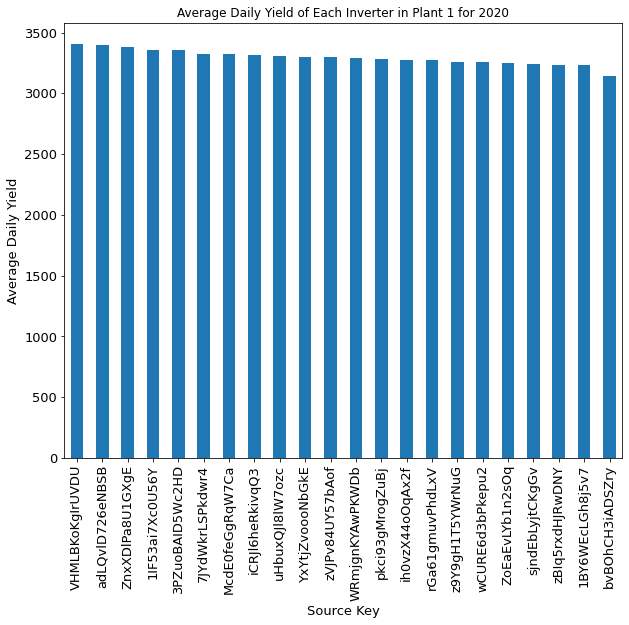

In [40]:
df_gen_1_clean.groupby(['source_key'])['daily_yield'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                                                  figsize = (10,8), fontsize = 13);
plt.title('Average Daily Yield of Each Inverter in Plant 1 for 2020')
plt.xlabel('Source Key', fontsize = 13)
plt.ylabel('Average Daily Yield', fontsize = 13)
plt.show();

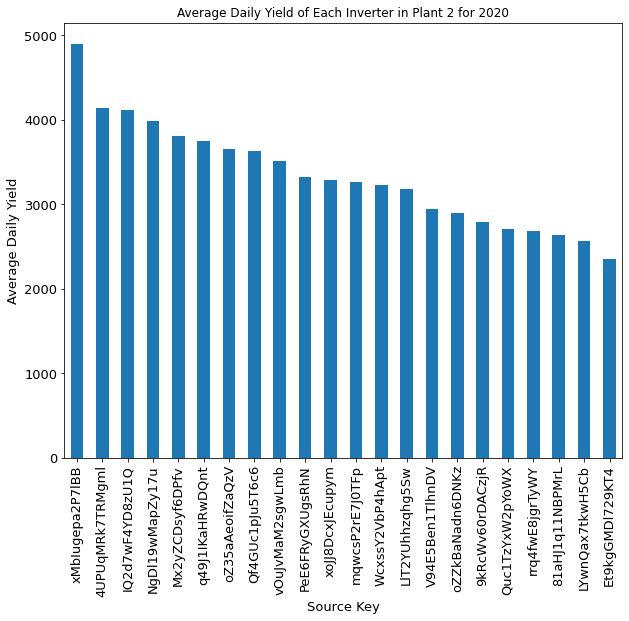

In [41]:
df_gen_2_clean.groupby(['source_key'])['daily_yield'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                                                  figsize = (10,8), fontsize = 13);
plt.title('Average Daily Yield of Each Inverter in Plant 2 for 2020')
plt.xlabel('Source Key', fontsize = 13)
plt.ylabel('Average Daily Yield', fontsize = 13)
plt.show();

In [42]:
daily_gen = df_gen_1_clean.copy()
daily_gen['date']=daily_gen['date_time'].dt.date

daily_gen = daily_gen.groupby('date').sum()
daily_gen

,plant_id,dc_power,ac_power,daily_yield,total_yield
date,,,,,
2020-01-06,8733122112,5.210134e+06,509691.499996,6.387988e+06,1.474426e+10
2020-02-06,8633882088,6.631811e+06,648667.570833,6.224743e+06,1.459238e+10
2020-03-06,8658692094,6.732591e+06,658508.402385,7.677981e+06,1.464635e+10
2020-04-06,8485022052,7.321031e+06,715775.188695,6.091402e+06,1.435999e+10
2020-05-06,8600802080,6.898474e+06,674574.155957,6.384127e+06,1.458579e+10
2020-05-15,8079791954,5.627239e+06,550830.959402,5.053591e+06,1.339679e+10
2020-05-16,7997091934,5.806138e+06,568359.821428,6.699905e+06,1.327337e+10
2020-05-17,8733122112,6.759595e+06,660975.389285,7.804065e+06,1.450777e+10
2020-05-18,8733122112,4.812549e+06,470969.708929,5.130290e+06,1.452094e+10


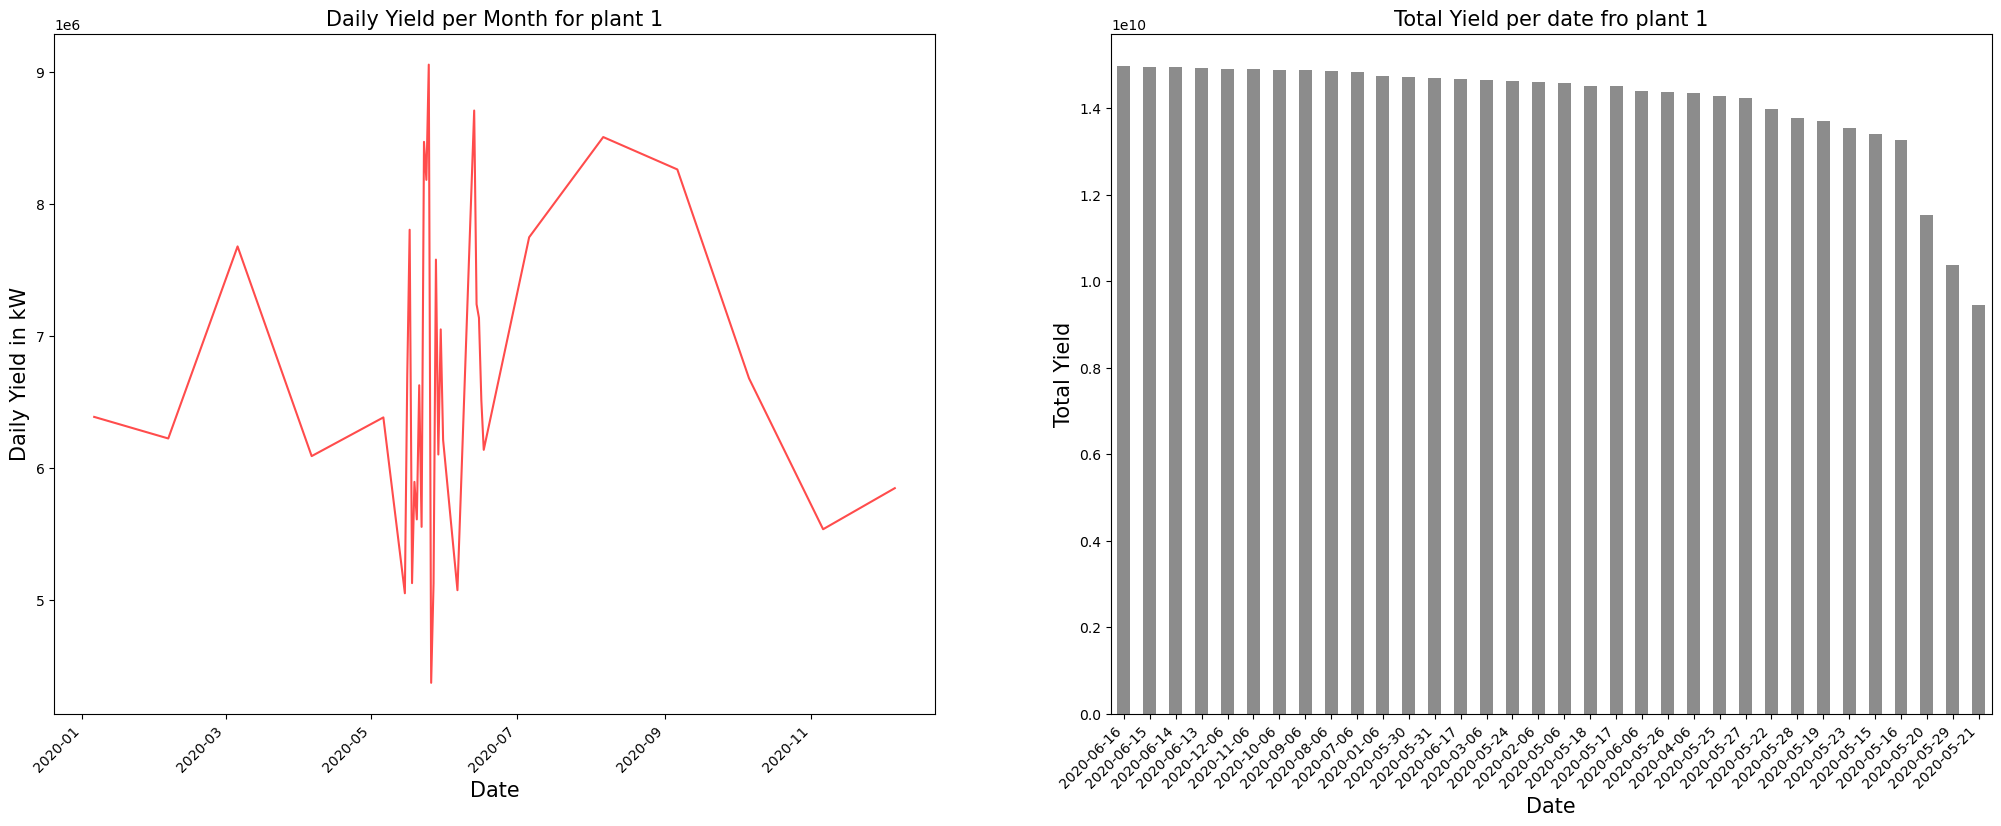

In [43]:
daily_gen = df_gen_1_clean.copy()
daily_gen['date']=daily_gen['date_time'].dt.date

daily_gen = daily_gen.groupby('date').sum()

fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(25,10))

daily_gen['daily_yield'].plot(ax=ax[0],color='red', alpha = .7)
daily_gen['total_yield'].sort_values(ascending = False).plot(kind='bar',ax=ax[1],color='grey', alpha = .9)

fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield per Month for plant 1', fontsize = 15)
ax[1].set_title('Total Yield per date fro plant 1', fontsize = 15)
ax[0].set_xlabel('Date', fontsize = 15)
ax[1].set_xlabel('Date', fontsize = 15)
ax[0].set_ylabel('Daily Yield in kW',fontsize=15)
ax[1].set_ylabel('Total Yield',fontsize=15)
plt.show()

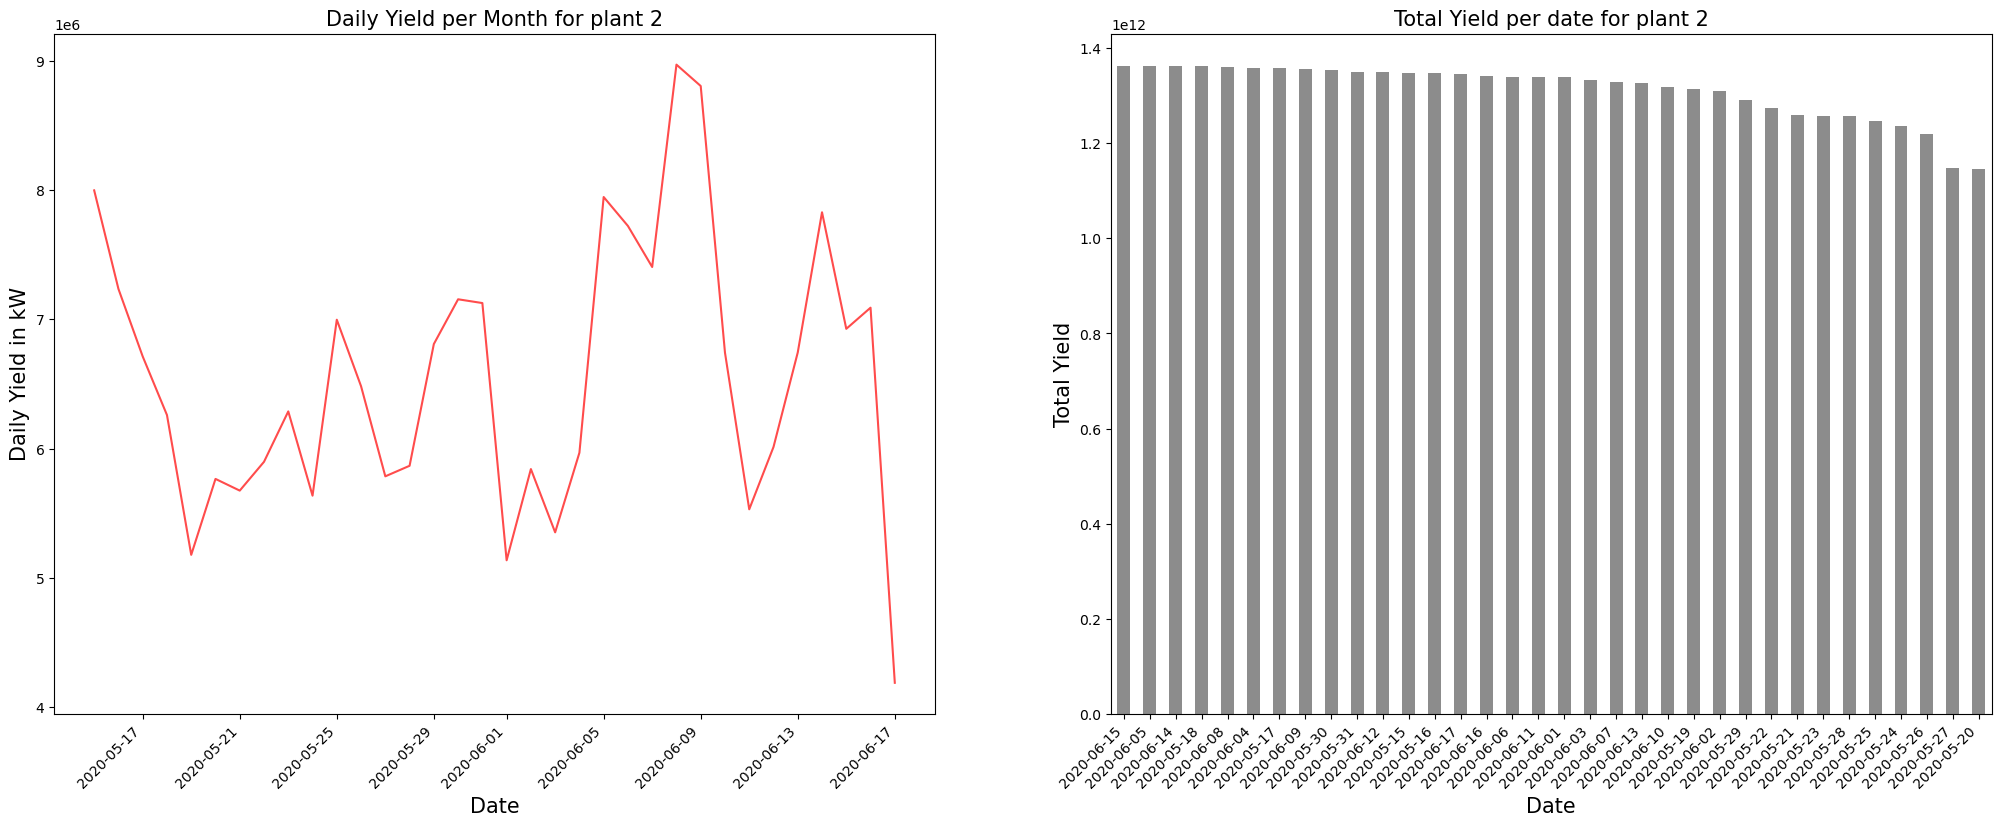

In [44]:
daily_gen = df_gen_2_clean.copy()
daily_gen['date']=daily_gen['date_time'].dt.date

daily_gen = daily_gen.groupby('date').sum()

fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(25,10))

daily_gen['daily_yield'].plot(ax=ax[0],color='red', alpha = .7)
daily_gen['total_yield'].sort_values(ascending = False).plot(kind='bar',ax=ax[1],color='grey', alpha = .9)

fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield per Month for plant 2', fontsize = 15)
ax[1].set_title('Total Yield per date for plant 2', fontsize = 15)
ax[0].set_xlabel('Date', fontsize = 15)
ax[1].set_xlabel('Date', fontsize = 15)
ax[0].set_ylabel('Daily Yield in kW',fontsize=15)
ax[1].set_ylabel('Total Yield',fontsize=15)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10980\568934782.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_gen_1_clean.set_index('time').drop('date_time',1)[['ac_power','dc_power']].plot(style='^',ax=ax[1])


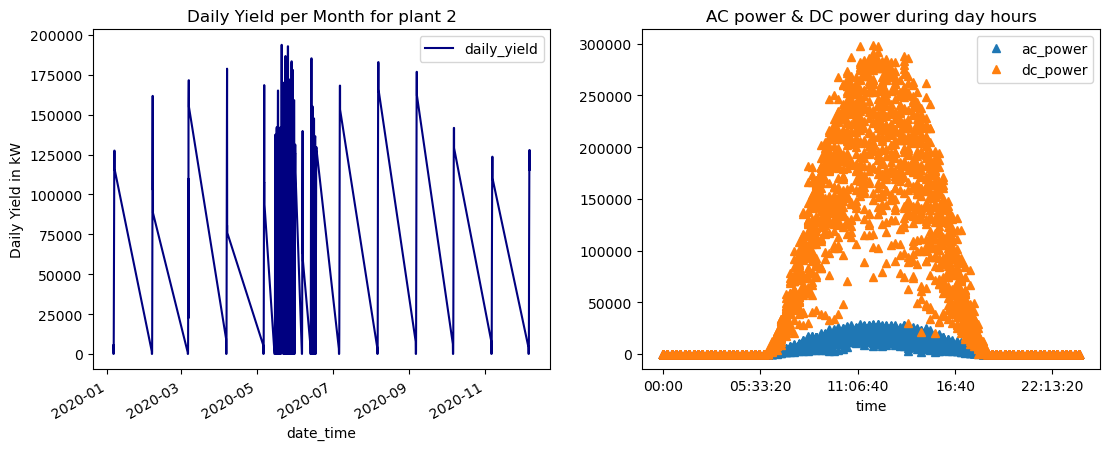

In [45]:
df_gen_1_clean = df_gen_1_clean.groupby('date_time').sum().reset_index()
df_gen_1_clean['time']= df_gen_1_clean['date_time'].dt.time

fig,ax = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(13,5))
# daily yield plot
df_gen_1_clean.plot(x='date_time',y='daily_yield',color='navy',ax=ax[0])

# AC & DC power plot
df_gen_1_clean.set_index('time').drop('date_time',1)[['ac_power','dc_power']].plot(style='^',ax=ax[1])

ax[0].set_title('Daily Yield per Month for plant 2')
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('Daily Yield in kW')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10980\1338582165.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_gen_2_clean.set_index('time').drop('date_time',1)[['ac_power','dc_power']].plot(style='^',ax=ax[1])


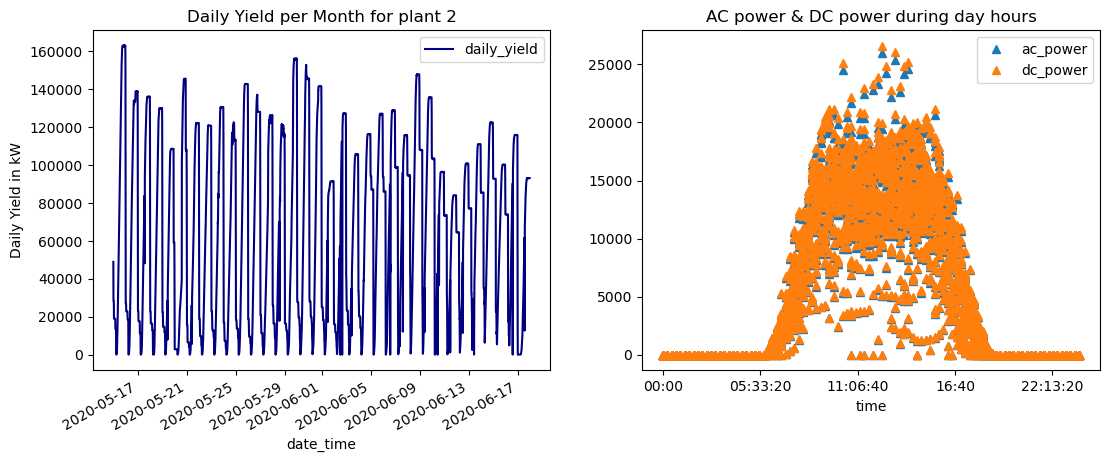

In [46]:
df_gen_2_clean = df_gen_2_clean.groupby('date_time').sum().reset_index()
df_gen_2_clean['time']= df_gen_2_clean['date_time'].dt.time

fig,ax = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(13,5))
# daily yield plot
df_gen_2_clean.plot(x='date_time',y='daily_yield',color='navy',ax=ax[0])

# AC & DC power plot
df_gen_2_clean.set_index('time').drop('date_time',1)[['ac_power','dc_power']].plot(style='^',ax=ax[1])

ax[0].set_title('Daily Yield per Month for plant 2')
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('Daily Yield in kW')
plt.show()

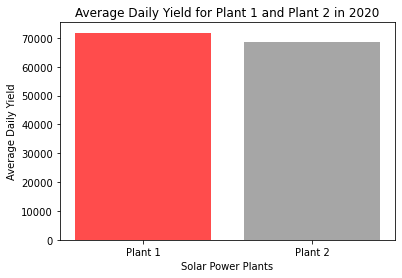

In [47]:
df_gen_1_clean['daily_yield'].mean()
df_gen_2_clean['daily_yield'].mean()

# Create a bar chart with proper labels

colors = ['red', 'grey']
locations = [1, 2]
heights = [df_gen_1_clean['daily_yield'].mean(), df_gen_2_clean['daily_yield'].mean()]
labels = ['Plant 1', 'Plant 2']
plt.bar(locations, heights, tick_label=labels, color = colors, alpha = .7)
plt.title('Average Daily Yield for Plant 1 and Plant 2 in 2020')
plt.xlabel('Solar Power Plants')
plt.ylabel('Average Daily Yield');

In [48]:
# mean value of the daily yield for plant 2
round(df_gen_2_clean['daily_yield'].mean(), 2)

68443.54

In [49]:
round(round(df_gen_1_clean['daily_yield'].mean(), 2) - round(df_gen_2_clean['daily_yield'].mean(), 2), 2)

3339.28

The mean value of daily yield of both plant ( plant 1 and plant 2) is almost the same because both plant has similar properties like number of inverters (**22**)

## 2. What is the average irradiation 

In [50]:
# Average irradiation for plant 1
irradiation_total = df_weather_sensor_1_clean['irradiation'].sum()
irradiation_average = irradiation_total/34
round(irradiation_average, 2)

21.37

In [51]:
# Average irradiation for plant 2
irradiation_total = df_weather_sensor_2_clean['irradiation'].sum()
irradiation_average = irradiation_total/34
round(irradiation_average, 2)

22.31

## 3. What is the maximum module and ambient temperature? How are they related 

In [52]:
# maximum module and ambient temperature for plant 1
round(df_weather_sensor_1_clean[['ambient_temperature', 'module_temperature']].max(), 2)

ambient_temperature    35.25
module_temperature     65.55
dtype: float64

In [53]:
# maximum module and ambient temperature for plant 2
round(df_weather_sensor_2_clean[['ambient_temperature', 'module_temperature']].max(), 2)

ambient_temperature    39.18
module_temperature     66.64
dtype: float64

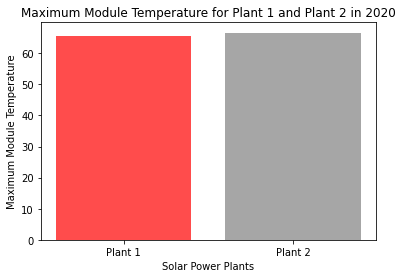

In [54]:
df_weather_sensor_1_clean['module_temperature'].max()
df_weather_sensor_2_clean['module_temperature'].max()

# Create a bar chart with proper labels

colors = ['red', 'grey']
locations = [1, 2]
heights = [df_weather_sensor_1_clean['module_temperature'].max(), df_weather_sensor_2_clean['module_temperature'].max()]
labels = ['Plant 1', 'Plant 2']
plt.bar(locations, heights, tick_label=labels, color = colors, alpha = .7)
plt.title('Maximum Module Temperature for Plant 1 and Plant 2 in 2020')
plt.xlabel('Solar Power Plants')
plt.ylabel('Maximum Module Temperature');


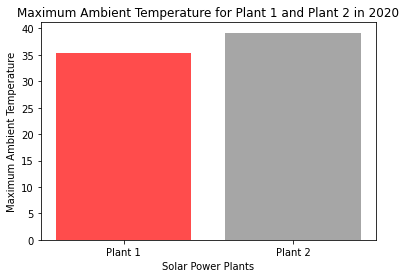

In [55]:
df_weather_sensor_1_clean['ambient_temperature'].max()
df_weather_sensor_2_clean['ambient_temperature'].max()

# Create a bar chart with proper labels

colors = ['red', 'grey']
locations = [1, 2]
heights = [df_weather_sensor_1_clean['ambient_temperature'].max(), df_weather_sensor_2_clean['ambient_temperature'].max()]
labels = ['Plant 1', 'Plant 2']
plt.bar(locations, heights, tick_label=labels, color = colors, alpha = .7)
plt.title('Maximum Ambient Temperature for Plant 1 and Plant 2 in 2020')
plt.xlabel('Solar Power Plants')
plt.ylabel('Maximum Ambient Temperature');


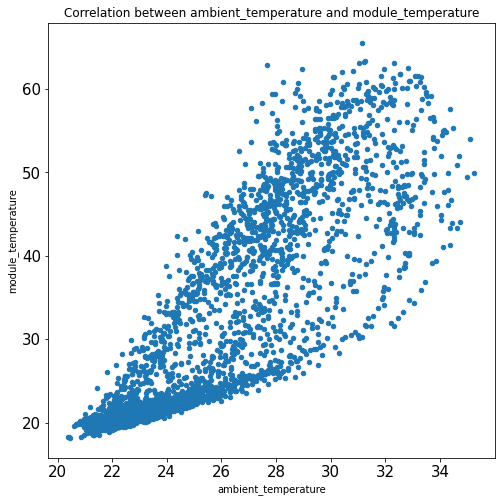

In [56]:
# Relationship between  module and ambient temperature for plant 1
df_weather_sensor_1_clean.plot(x = "ambient_temperature" , y = "module_temperature", kind = "scatter", fontsize = 15,
                title = 'Correlation between ambient_temperature and module_temperature', figsize = (8,8));

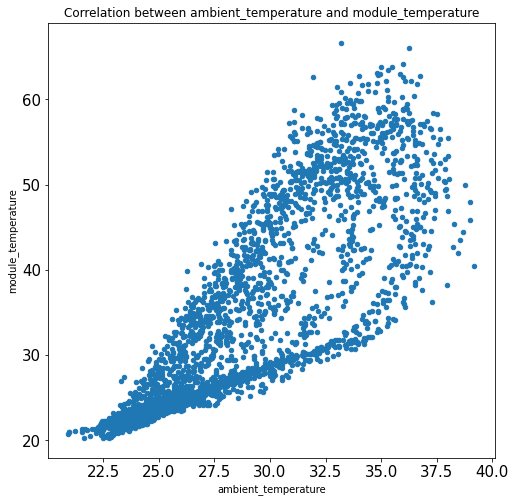

In [57]:
# Relationship between  module and ambient temperature for plant 1
df_weather_sensor_2_clean.plot(x = "ambient_temperature" , y = "module_temperature", kind = "scatter", fontsize = 15,
                title = 'Correlation between ambient_temperature and module_temperature', figsize = (8,8));

## 4. How many inverters are present for each plants 

In [58]:
# verifying the total number of inverters in plant 1
total_inverter_id = df_gen_1_clean['source_key'].unique()

print(total_inverter_id)
print ('The Total Number of Inverters in plant 1 is:', len(df_gen_1_clean['source_key'].unique()))

KeyError: 'source_key'

In [ ]:
# verifying the total number of inverters in plant 2
total_inverter_id = df_gen_2_clean['source_key'].unique()

print(total_inverter_id)
print ('The Total Number of Inverters in plant 2 is:', len(df_gen_2_clean['source_key'].unique()))

## 5. Which inverter generates maximum DC/AC power for the whole year

In [ ]:
# finding the index of the max 'dc_power' and 'ac_power'in plant 1
df_gen_1_clean[['dc_power', 'ac_power']].idxmax(axis = 0)

In [ ]:
# finding the index of inverter with the max dc_power and ac_power plant 1
print ('Inverter with max dc_power: ', df_gen_1_clean['source_key'][61624])
print ('Inverter with max ac_power: ', df_gen_1_clean['source_key'][61624]) 

Analysis shows that only inverter with source key(id) **wCURE6d3bPkepu2** has the maximum dc_power and ac_power in plant 1

In [ ]:
# finding the index of the max 'dc_power' and 'ac_power'in plant 2
df_gen_2_clean[['dc_power', 'ac_power']].idxmax(axis = 0)

In [ ]:
# finding the index of inverter with the max dc_power and ac_power plant 1
print ('Inverter with max dc_power: ', df_gen_1_clean['source_key'][41423])
print ('Inverter with max ac_power: ', df_gen_1_clean['source_key'][41423]) 

Analysis shows that only inverter with source key(id) **ZoEaEvLYb1n2sOq** has the maximum dc_power and ac_power in plant 2

## 6. How is module and ambient temperature affected by irradiation 

In [ ]:
# correlation between module and ambient temperature for plant 1
plt.figure(figsize = (10,10))
c = df_weather_sensor_1_clean.corr()
sns.heatmap(c, cmap = 'coolwarm', annot = True)
c

In [ ]:
# correlation between module and ambient temperature for plant 2
plt.figure(figsize = (10,10))
c = df_weather_sensor_2_clean.corr()
sns.heatmap(c, cmap = 'coolwarm', annot = True)
c

## 7. What is the efficiency of DC to AC conversion? Can this be used to find faulty inverters

In [ ]:
# efficiency of DC to AC conversion for plant 1
df_gen_1_clean['time'] = pd.to_datetime(df_gen_1_clean['date_time']).dt.time

df_gen_1_clean = df_gen_1_clean.groupby(['time', 'source_key'])['dc_power'].mean().unstack()

cmap = sns.color_palette('Spectral', n_colors = 12)
fig,ax = plt.subplots(ncols = 2, nrows = 1, dpi = 100, figsize = (16, 9))

df_gen_1_clean.iloc[:, 0:11].plot(ax = ax[0], color = cmap)
df_gen_1_clean.iloc[:, 11:22].plot(ax = ax[1], color = cmap)

ax[0].set_title = ('First 11 sources')
ax[0].set_ylabel = ('Dc Power (KW)')
ax[1].set_title = ('Last 11 sources')

plt.show();

In [ ]:
# efficiency of DC to AC conversion for plant 2
df_gen_2_clean['time'] = pd.to_datetime(df_gen_2_clean['date_time']).dt.time

df_gen_2_clean = df_gen_2_clean.groupby(['time', 'source_key'])['dc_power'].mean().unstack()

cmap = sns.color_palette('Spectral', n_colors = 12)
fig,ax = plt.subplots(ncols = 2, nrows = 1, dpi = 100, figsize = (16, 9))

df_gen_2_clean.iloc[:, 0:11].plot(ax = ax[0], color = cmap)
df_gen_2_clean.iloc[:, 11:22].plot(ax = ax[1], color = cmap)

ax[0].set_title = ('First 11 sources')
ax[0].set_ylabel = ('Dc Power (KW)')
ax[1].set_title = ('Last 11 sources')

plt.show();